<a href="https://colab.research.google.com/github/AmithisCurious/Handwritten_Text_Recognition/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 624s 1s/step - loss: 0.0867 - accuracy: 0.9743 - val_loss: 0.1271 - val_accuracy: 0.9655
Epoch 2/10
469/469 [==============================] - 615s 1s/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0362 - val_accuracy: 0.9875
Epoch 3/10
469/469 [==============================] - 602s 1s/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0338 - val_accuracy: 0.9891
Epoch 4/10
469/469 [==============================] - 600s 1s/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 5/10
469/469 [==============================] - 600s 1s/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 593s 1s/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0406 - val_accuracy: 0.9887
Epoch 7/10
469/469 [==============================] - 594s 1s/step - loss: 0.

Enter Image name0


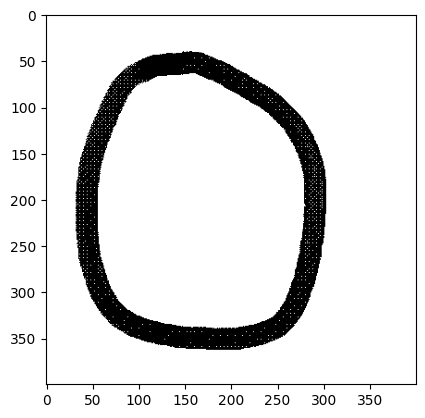

1/1 [==============================] - 0s 443ms/step
predicted value: 0
Enter Image name0a


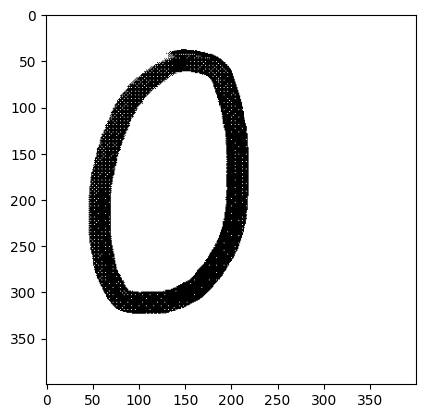

1/1 [==============================] - 0s 46ms/step
predicted value: 9
Enter Image name1


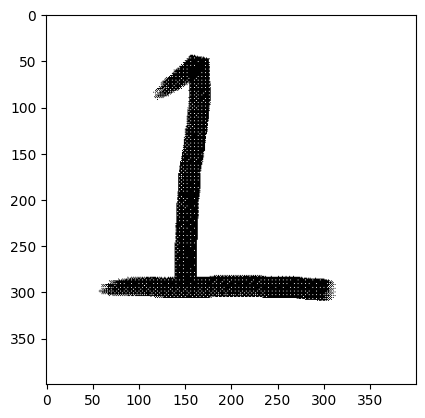

1/1 [==============================] - 0s 30ms/step
predicted value: 4
Enter Image name1a


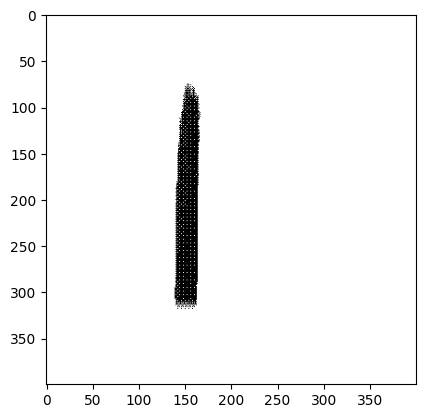

1/1 [==============================] - 0s 28ms/step
predicted value: 8
Enter Image name2


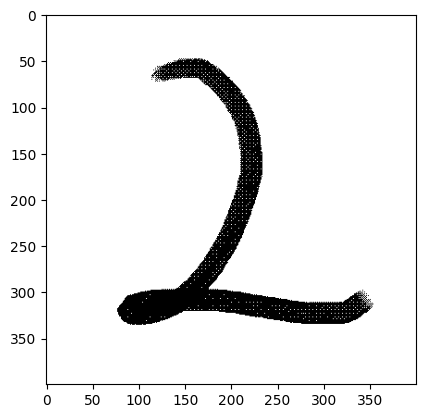

1/1 [==============================] - 0s 42ms/step
predicted value: 9
Enter Image name2a


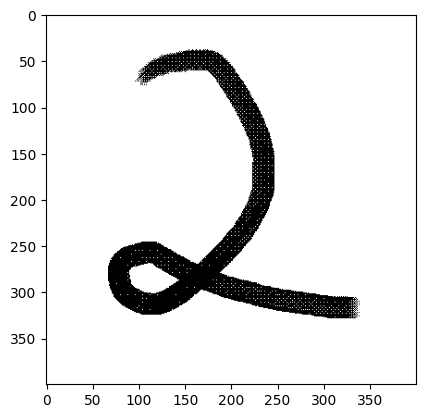

1/1 [==============================] - 0s 29ms/step
predicted value: 2
Enter Image name2b


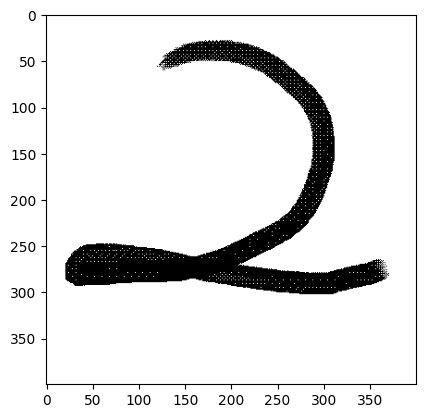

1/1 [==============================] - 0s 29ms/step
predicted value: 2
Enter Image name2c


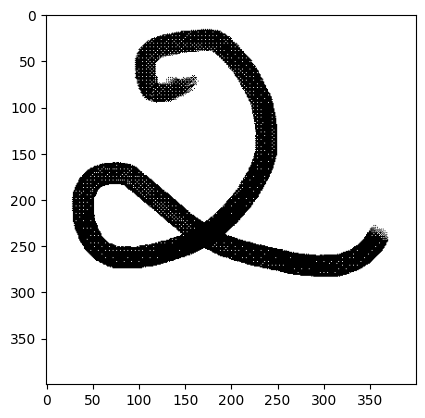

1/1 [==============================] - 0s 30ms/step
predicted value: 2
Enter Image name3


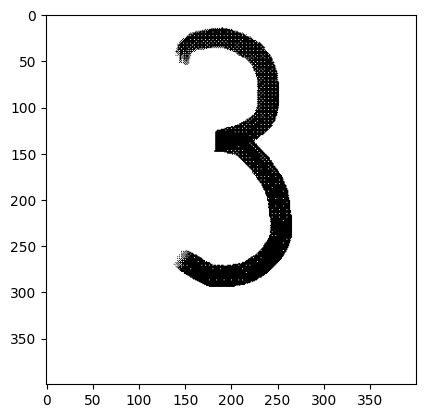

1/1 [==============================] - 0s 29ms/step
predicted value: 3
Enter Image name3a


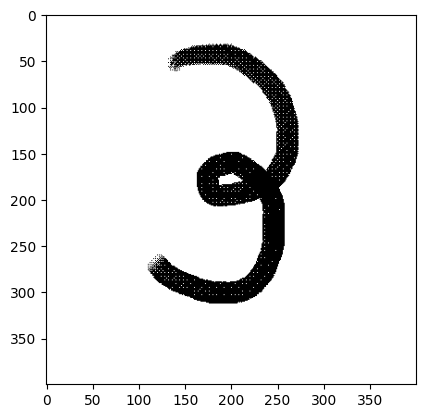

1/1 [==============================] - 0s 32ms/step
predicted value: 3
Enter Image name4


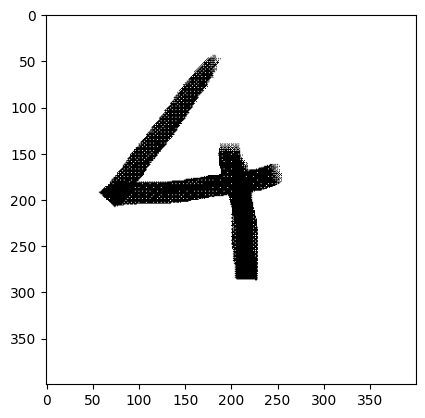

1/1 [==============================] - 0s 31ms/step
predicted value: 9
Enter Image name4a


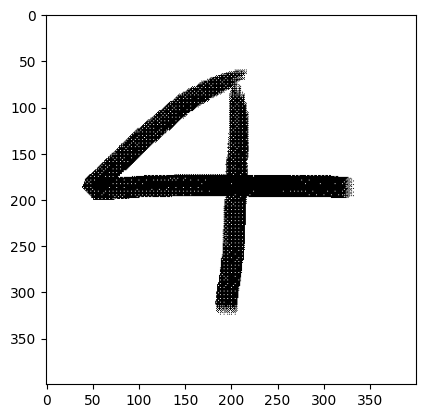

1/1 [==============================] - 0s 34ms/step
predicted value: 8
Enter Image name4b


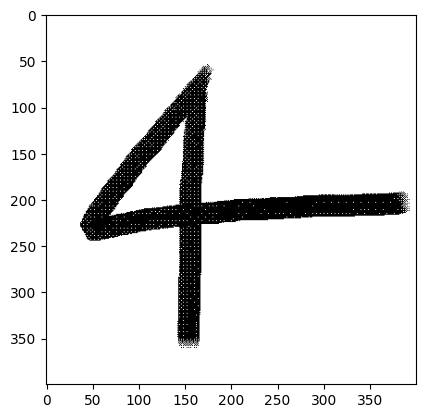

1/1 [==============================] - 0s 47ms/step
predicted value: 8
Enter Image name5


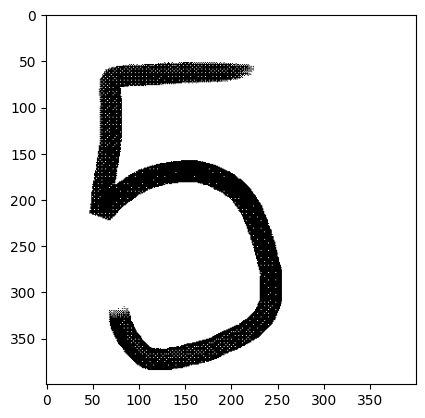

1/1 [==============================] - 0s 29ms/step
predicted value: 3
Enter Image name5a


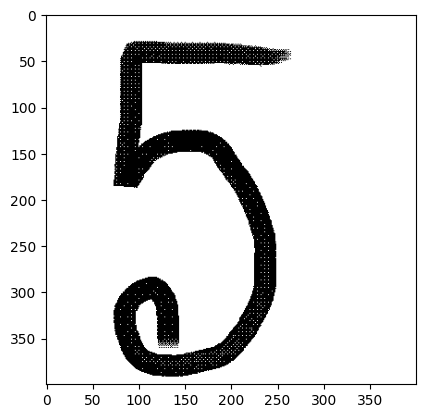

1/1 [==============================] - 0s 30ms/step
predicted value: 3
Enter Image name5b


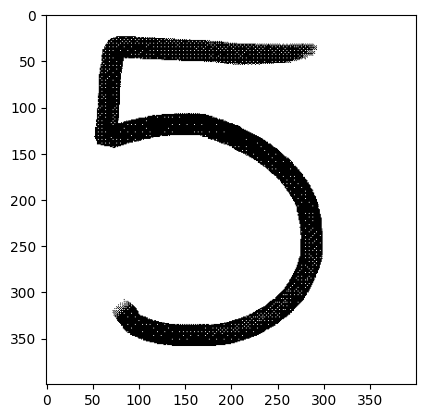

1/1 [==============================] - 0s 35ms/step
predicted value: 3
Enter Image name6


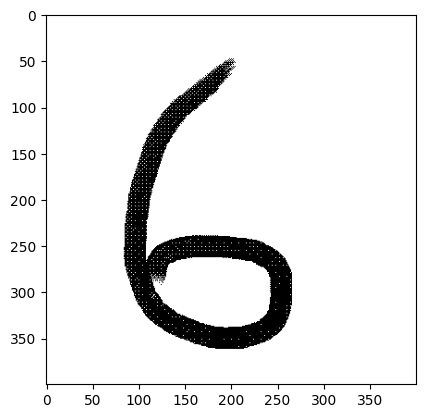

1/1 [==============================] - 0s 31ms/step
predicted value: 8
Enter Image name6a


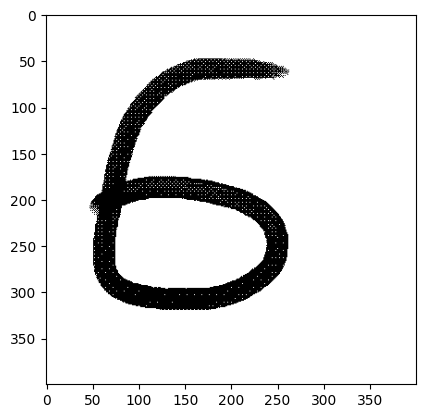

1/1 [==============================] - 0s 29ms/step
predicted value: 5
Enter Image name6c


AttributeError: ignored

In [ ]:
import cv2
import matplotlib.pyplot as plt

ch = 1
while ch == 1:
  path = input("Enter Image name")
  img = cv2.imread(f"/content/{path}.png")
  img_copy = img.copy()
  plt.imshow(img, cmap = "gray")
  plt.show()

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (400,440))

  img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
  img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
  _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

  img_final = cv2.resize(img_thresh, (28,28))
  img_final =np.reshape(img_final, (1,28,28,1))

  digit= model.predict(img_final)
  print('predicted value:',np.argmax(digit))
